In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # para leer datos
import sklearn.manifold
import glob
import sklearn.cluster
import umap

Nuestro dataset se obtiene de https://www.kaggle.com/moltean/fruits  <br />
Por la rapidez del algoritmo solo se tomo del folder test, de una sola fruta, 13 frutas. <br />
Organizamos las frutas en un dataset en el que les cambiamos la dimensionalidad y le asignamos a cada una de las frutas un numero

In [2]:
folderset = [folder for folder in glob.glob("Test/" + "**/", recursive=True)]
data = []
Y = []
largo = len(folderset)
for i in range(largo):
    fruta = folderset[i]
    imagenes = glob.glob("{}/*.jpg".format(fruta))
    print(str(i) +' Fruta')
    for imagen in imagenes:
        aqui = plt.imread(imagen).flatten()
        data.append(np.array(aqui))
        Y.append(i)
        
data = np.array(data)
print(np.shape(data),np.shape(Y))

0 Fruta
1 Fruta
2 Fruta
3 Fruta
4 Fruta
5 Fruta
6 Fruta
7 Fruta
8 Fruta
9 Fruta
10 Fruta
11 Fruta
12 Fruta
13 Fruta
(2143, 30000) (2143,)


Vamos a hacer tres modelos en los que variamos cada uno de las variables importantes en el UMAP <br />
Primero variamos el número de vecinos. 

/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 91 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 

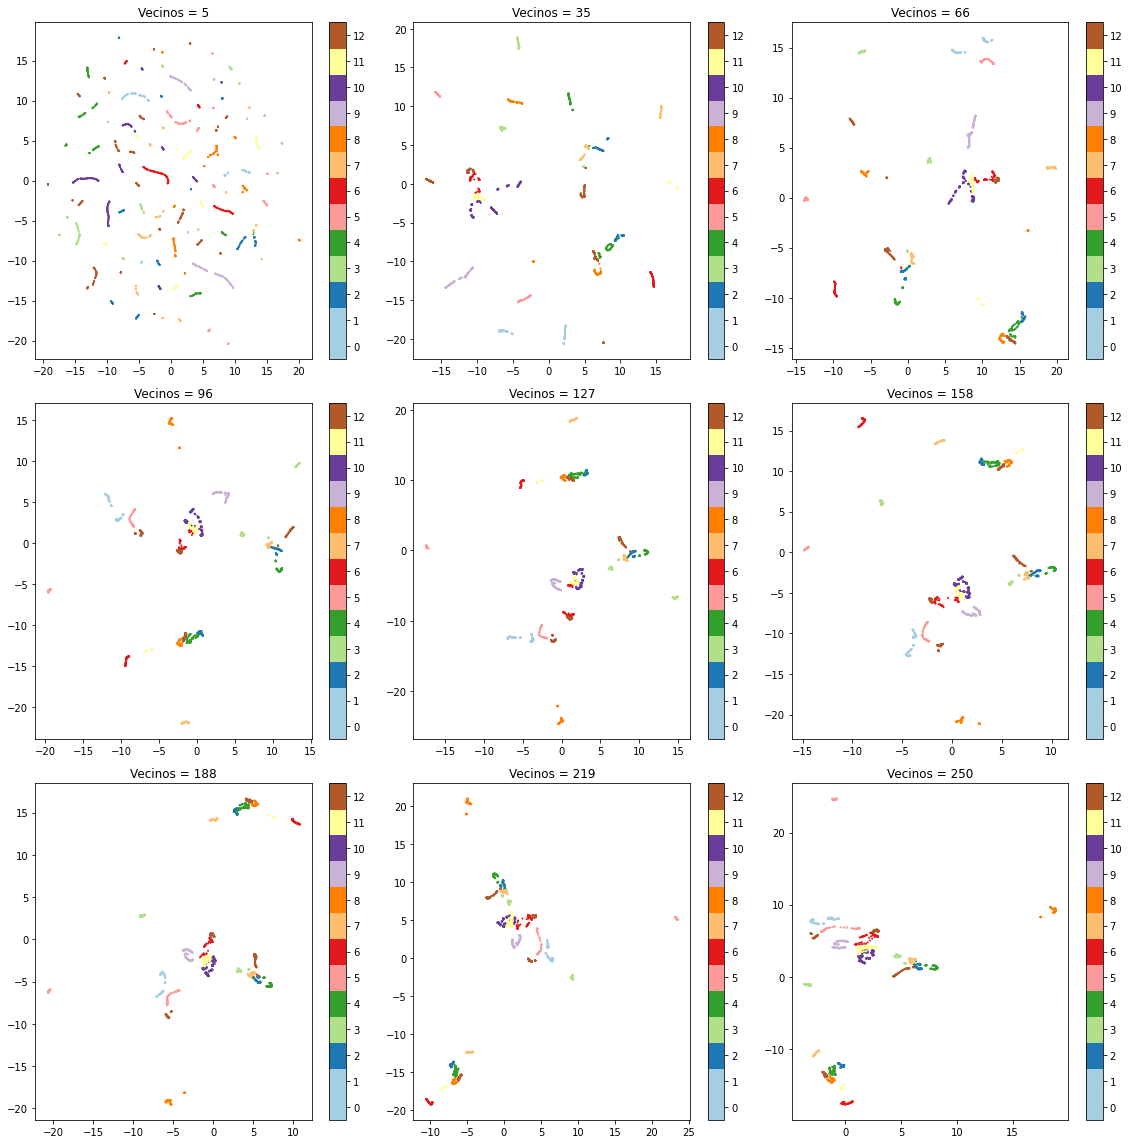

In [6]:
neig = np.linspace(5,250,9)
plt.figure(figsize=(16,16))
for i in range(0,9):
    UmAp = umap.UMAP(n_neighbors=np.int_(neig[i]))
    UmAp.fit(data)
    embedding = UmAp.transform(data)
    plt.subplot(3,3,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = Y, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(14)-0.5).set_ticks(np.arange(14))
    plt.title('Vecinos = {}'.format(np.int_(neig[i])))
plt.tight_layout()


Vemos entonces como el número de vecinos es muy importante pues va a influenciar en los tamaños de los grupos. El mejor es uno dónde los colores no estan tan separados. Se tomará n_neigh = 66 <br />
Ahora variamos la mínima distancia. 

/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/s

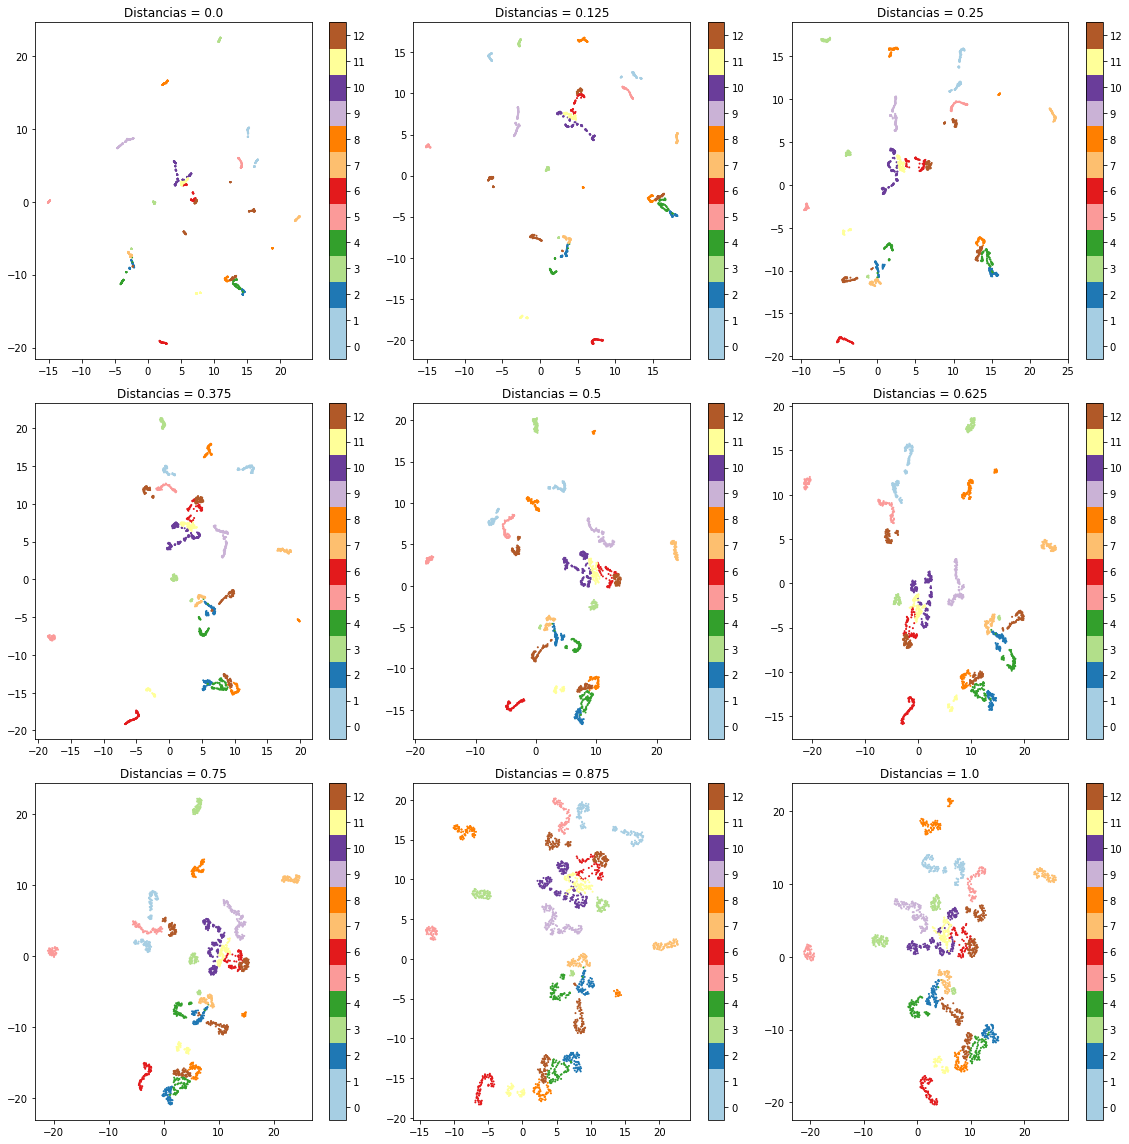

In [9]:
dis = np.linspace(0,1,9)
plt.figure(figsize=(16,16))
for i in range(0,9):
    UmAp = umap.UMAP(n_neighbors=66, min_dist=dis[i])
    UmAp.fit(data)
    embedding = UmAp.transform(data)
    plt.subplot(3,3,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = Y, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(14)-0.5).set_ticks(np.arange(14))
    plt.title('Distancias = {}'.format(dis[i]))
plt.tight_layout()

Vemos entonces como entre más la distancia más se ven los grupos distintivos, lo que en la referencia es la estructura más general. Vamos a escoger entonces una minima distancia de 0.875 <br />
Finalmente vamos a variamos la métrica.

/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


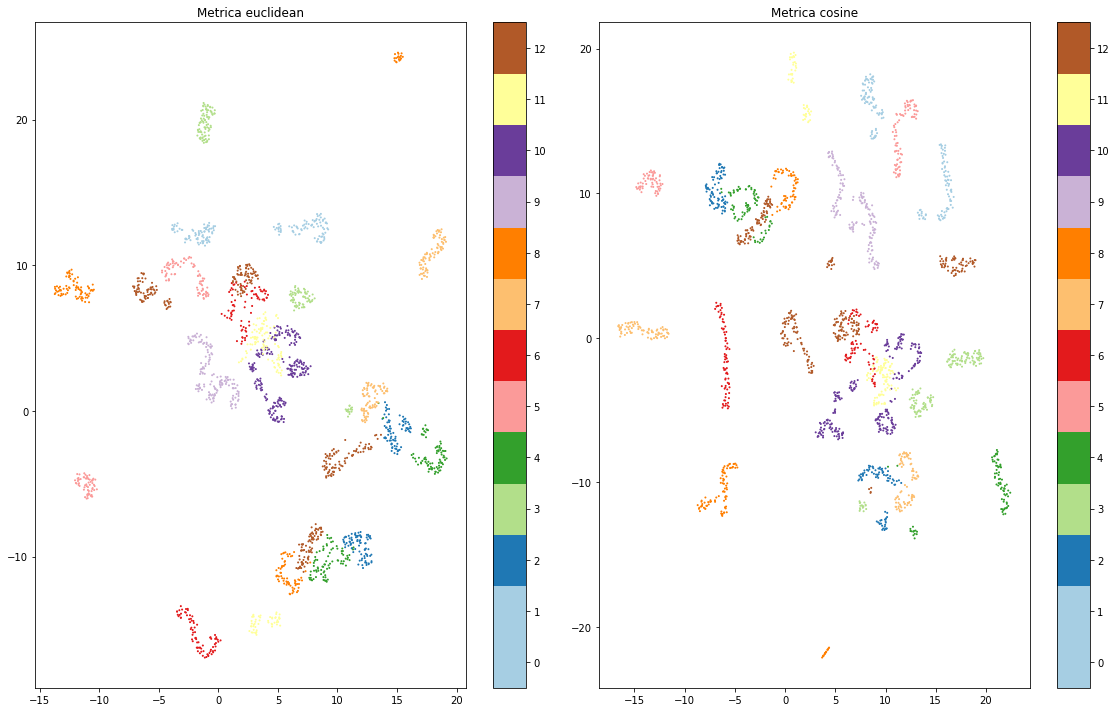

In [4]:
plt.figure(figsize=(16,10))
metricas =["euclidean", "cosine"]
for i in (range(len(metricas))):
    UmAp = umap.UMAP(n_neighbors=66, min_dist= 0.875, metric=metricas[i])
    UmAp.fit(data)
    embedding = UmAp.transform(data)
    plt.subplot(1,2,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = Y, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(14)-0.5).set_ticks(np.arange(14))
    plt.title('Metrica ' + metricas[i])
plt.tight_layout()



Es más clara la diferencia de los grupos con la métrica de cosine <br />
Lo que ahora falta hacer es un K means a ver si podemos diferencias claramente los tipos de frutas que tenemos 

In [5]:
#Primero correomos el umap con los valores que decidimos para los vecinos, la distancia minima y la metrica.
UmAp = umap.UMAP(n_neighbors=66, min_dist= 0.875, metric="cosine")
UmAp.fit(data)
embedding = UmAp.transform(data)

/srv/conda/envs/notebook/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


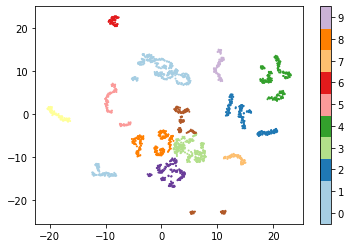

In [6]:
# clusters sobre los resultados de tsne
n_clusters = 14
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

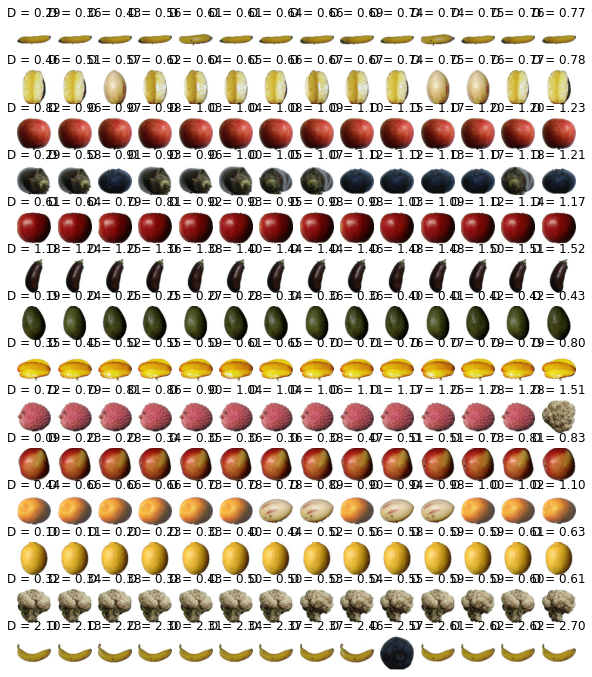

In [9]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 14
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(data[ind].reshape(100,100,3))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')
